In [5]:
import pandas as pd
import csv

In [6]:
prefex = '/Users/rjing/Desktop/Machine_Learning_Nonpoint_Source_Pollution/data/weather_data/weather_data_standardized.xlsx'

df = pd.read_excel(prefex)
print(df.columns)

Index(['Date', 'Dew Point Temperature (F)', 'Average Temperature (F)',
       'Visibility (mi)', 'Average Wind Speed (knots)',
       'Maximum Sustained Wind Speed (knots)', 'Maximum Gust (knots)',
       'Maximum Temperature (F)', 'Minimum Temperature (F)',
       'Precipitation (in)'],
      dtype='object')


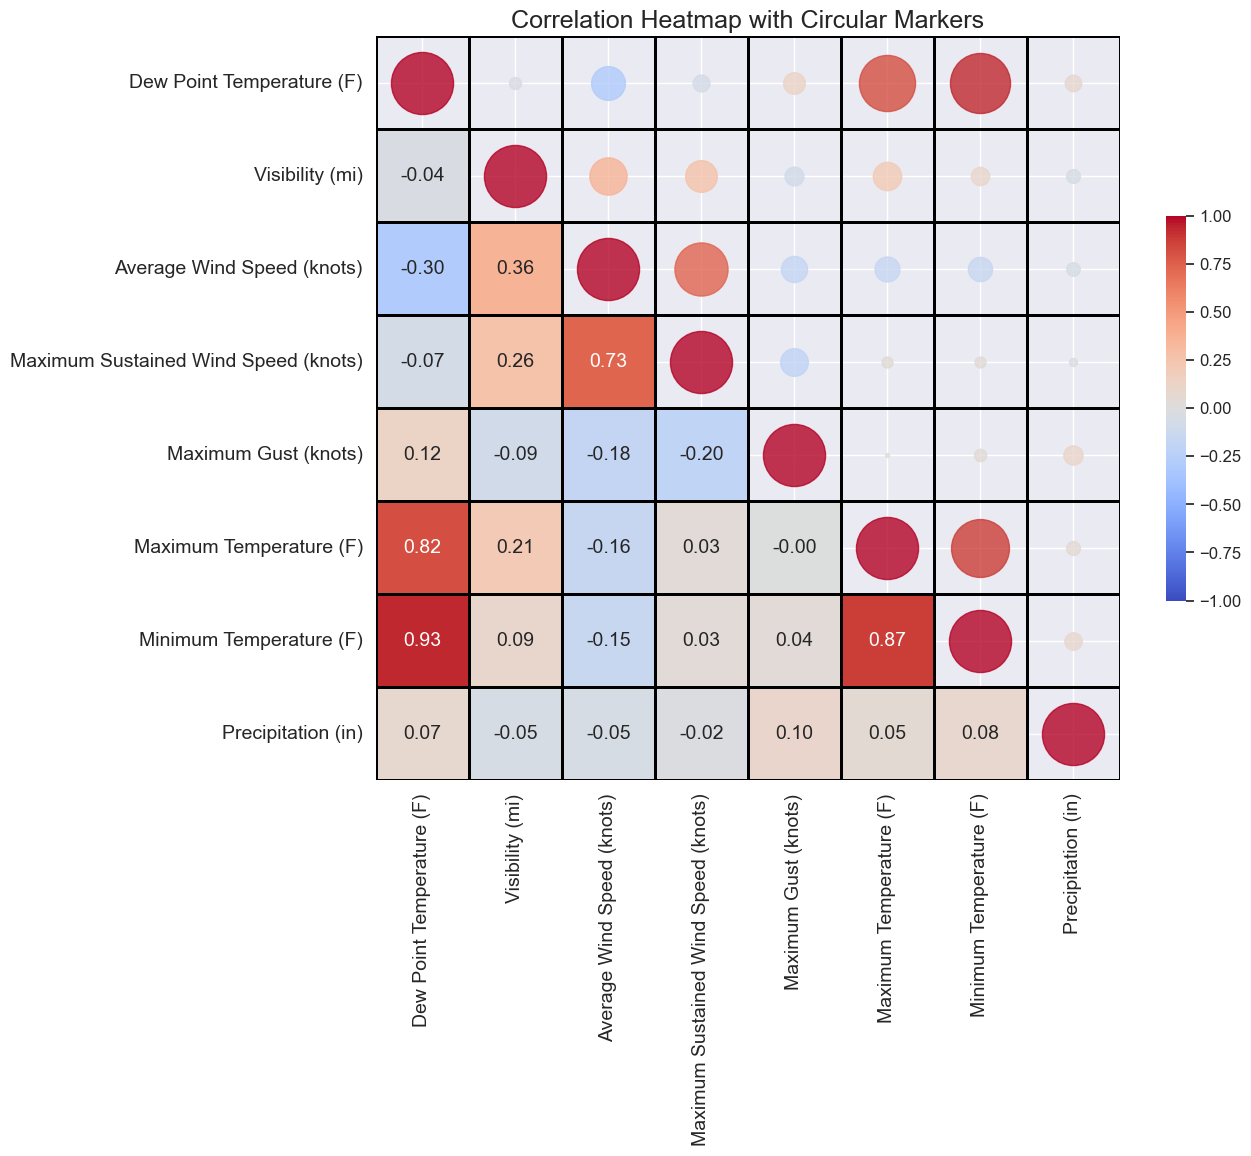

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# Load standardized weather data
file_path = '/Users/rjing/Desktop/Machine_Learning_Nonpoint_Source_Pollution/data/weather_data/weather_data_standardized.xlsx'
df = pd.read_excel(file_path)
df = df.drop(columns=['Average Temperature (F)'])
# Drop the Date column
df_numeric = df.drop(columns=['Date'])

# Compute correlation matrix
corr_matrix = df_numeric.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12, 10))  # Bigger figure size

# Set larger font sizes for heatmap annotations
sns.set(font_scale=1.5)  # Increase font size globally

# Adjust the colormap to a higher contrast one (coolwarm, red for high, blue for low)
cmap = "coolwarm"  # Default coolwarm, high correlations are red, low are blue

# Normalize to scale between -1 and 1
norm = Normalize(vmin=-1, vmax=1)

# Draw the heatmap on the lower triangle with black borders on every cell
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap=cmap, fmt=".2f",
            linewidths=0.75, linecolor="black", vmin=-1, vmax=1, ax=ax,
            cbar_kws={'shrink': 0.5}, annot_kws={"size": 14},
            square=True, norm=norm)  # Ensure square cells for better alignment

# Plot the upper triangle with circles (scatter plot)
for i in range(len(corr_matrix.columns)):
    for j in range(i, len(corr_matrix.columns)):  # Only upper triangle
        coef = corr_matrix.iloc[i, j]
        color = plt.cm.coolwarm(norm(coef))  # Use coolwarm colormap to get color
        ax.scatter(j + 0.5, i + 0.5, s=abs(coef) * 2000, color=color, alpha=0.8)

# Set title and labels with bigger font sizes
plt.title("Correlation Heatmap with Circular Markers", fontsize=18)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(rotation=0, fontsize=14)

# Adjust color bar font size
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)  # Increase color bar tick size

# Save the figure
plt.savefig("correlation_heatmap_fully_bordered.png", dpi=400, bbox_inches="tight")

# Show the plot
plt.show()
